#### Instruction
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- Describe the steps in the "Description:" field.

#### Group Information

Group No: Derma_2

- Member 1: MIOR MUHAMMAD IRFAN BIN MIOR LATFEE (158450)
- Member 2: MOHAMAD NAZMI BIN HASHIM (158616)
- Member 3: MUHAMMAD HAIQAL BIN RAFIQUZZAMAN (158852)
- Member 4: MUHAMMAD KHAWARIZMI BIN JEFRI (158520)


#### Import libraries

In [1]:
# This line serves as a configuration option for Jupyter Notebook's Jedi autocomplete library
%config Completer.use_jedi=False

# This lines imports NumPy library that is used to support effective numerical operations and arrays in Python
import numpy as np #linear algebra

#This line imports the Pandas library, which provides data manipulation and analysis tools in Python
import pandas as pd #data processing,CSV file I/O (e.g. pd.read_csv)

# This line imports the pyplot module from the Matplotlib library, that is used create various types of plots and visualizations.
import matplotlib.pyplot as plt #for data visualization

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")


#all new import
import tensorflow as tf
from tensorflow import keras

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L2
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

import random

#### Load the dataset

# Import dataset dermatology that is in csv file format into the dataframe
# Dataframe is renamed as 'dataset'

dataset = pd.read_csv('dermatology.csv', header = None)

#Read the txt file
with open('dataset derma.txt', 'r') as f:
    attributes  = f.readlines()
    
#create a dictionary of features
attribute_dict = {}
for i, line in enumerate(attributes):
    attribute_dict [i] = line.strip()
    
dataset.columns = attribute_dict.values()

# Save the dataset to a CSV file called dermatology_header.csv
dataset.to_csv('dermatology_header.csv', index=False)

In [2]:
# Load the dataset to enable the data can be worked with read data from a csv file
dataset = pd.read_csv("dermatology_header.csv")

In [3]:
# Display the first 5 row of the dataset
dataset.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Result
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
# Display the last 5 rows of the dataset
dataset.tail()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Result
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35,1


In [5]:
# Get the quick overview of the data distribution and the dain insights about dataset
dataset.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Result
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [6]:
# Check any NULL values in the dataframe
dataset.apply(lambda x: sum(x.isnull()), axis=0)

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

<b>Note:</b> The result above shows that there is no null values in all features (columns) because the value for all columns are zero. However, take note that there are 8 missing values in Age column where the missing values is represented by the symbol '?'. That is the reason why the value of null values in Age column is zero as symbol ? is considered as values in that particular columns.

In [7]:
# Find any rows that have at least one missing value.
null_rows = dataset[dataset.isnull().any(axis=1)]

# Removes all of the rows that contain missing values.
dataset = dataset.dropna()

In [8]:
# Remove rows where the value in the Age column is ?.
dataset = dataset.loc[dataset['Age'] != '?']

<b>Note:</b> The values of '?' that represented the missing values in Age column have been removed to ensure the accuracy of the model are accurate when being used to predict the classification problem.

In [9]:
# Returns the number of rows and columns in the DataFrame named "dataset"
dataset.shape

(358, 35)

<b>Note:</b> The original dataset has 366 rows of the data. However, after the 8 columns that has the missing values in Age column have been removed, the current dataset has only 358 rows of the data to be learnt by the model.

#### Split the dataset
Split the dataset into training, validation and test sets.

In [10]:
# Scikit-learn provides a tool called train_test_split that assists in dividing 
# a dataset into training and testing subsets. 
from sklearn.model_selection import train_test_split

In [11]:
# This line selects all the rows of the dataset and all columns except the last column
X = dataset.iloc[:, :-1] #assigning features to a variable

# This line selects all the rows of the dataset and only the last column
y = dataset.iloc[:, -1]  ##assigning target to a variable

In [12]:
# Split the dataset 
# Note: Random state is used to split the same row constantly
# Note: Stratify argument is used to ensure that the proportions 
#       of the different classes in the training and test sets are the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Divide set for validation set
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5, stratify=y_train)

In [13]:
#Display number of rows and columns for the datasets
print('Test set:\t', X_test.shape, y_test.shape)
print('Train set:\t', X_train2.shape, y_train2.shape)
print('Validation set: ', X_val.shape, y_val.shape)

Test set:	 (72, 34) (72,)
Train set:	 (214, 34) (214,)
Validation set:  (72, 34) (72,)


#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description: The feature 'Age' which is noisy as it contains continuous values is put into bins. The original data values are divided into intervals of 20 to indicate different age group.

In [14]:
# Import the LabelEncoder classes
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label = LabelEncoder()

In [15]:
# Create bins for the ages
bins = (0, 20, 40, 60, 80)

# Create names for the age categories
group_names = ['young', 'adult' ,'middle age', 'elderly']

# Create a new column called Age in the X_train DataFrame
# The values in this column are the age of the person, but they have been grouped into four categories
X_train2['Age'] = pd.cut(X_train2['Age'].astype(int), bins = bins, labels = group_names)

In [16]:
# Convert the values in the Age column to numerical values
X_train2['Age'] = label.fit_transform(X_train2['Age'])

In [17]:
# Count the number of times each unique value appears in the Age column
X_train2['Age'].value_counts()

0    90
2    70
3    41
1    12
4     1
Name: Age, dtype: int64

In [18]:
# Display the "X_train" DataFrame
X_train2

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age
200,1,1,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,0,3
31,3,2,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
19,1,1,0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,3
41,1,1,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,1
150,1,2,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,2,1,1,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,2,0,0
166,2,3,2,2,1,0,0,0,2,2,...,0,0,0,0,0,0,0,2,0,1
55,2,2,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,3
319,3,2,2,0,0,0,0,0,2,2,...,0,3,0,0,0,0,0,3,0,2


#### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

Feature importance is a measure of how much each feature contributes to the accuracy of a machine learning model. It can be used to understand which features are most important for making predictions, and to identify features that may be irrelevant or noisy.

The method we choose to calculate feature importance is information gain. Information gain calculates the amount of information that is gained by adding each feature to the model.

In [19]:
# Copy the train set into another variable
X_fs = X_train2
y_fs = y_train2

[0.01106698 0.0208589  0.01539712 0.01984705 0.03997334 0.02503835
 0.01721872 0.03094988 0.0300721  0.01658477 0.00516381 0.03328327
 0.00970981 0.04130266 0.06231584 0.0333386  0.01069009 0.00875595
 0.01187742 0.1084934  0.06081456 0.06378827 0.01090539 0.01975862
 0.03025388 0.02537643 0.04371294 0.05878279 0.04116623 0.01759831
 0.02558174 0.00775625 0.03275302 0.00981351]


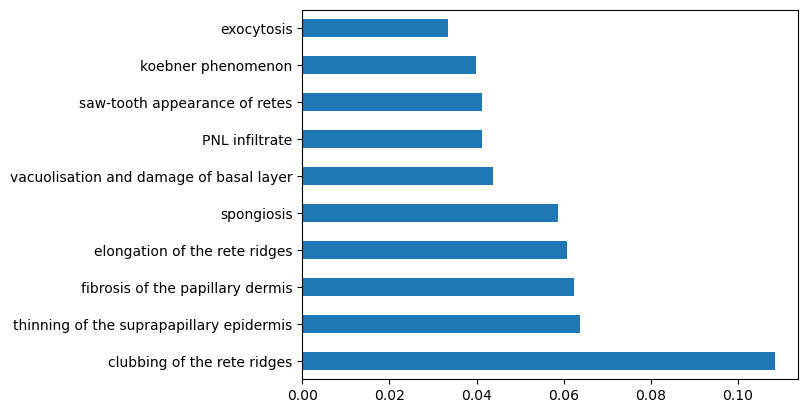

In [20]:
# Import the ExtraTreesClassifier class from sklearn.ensemble
from sklearn.ensemble import ExtraTreesClassifier

# Import the matplotlib.pyplot module as plt
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Create an ExtraTreesClassifier model
model = ExtraTreesClassifier()

# Fit the model to the X_fs and y_fs data
model.fit(X_fs, y_fs)

# Print the feature importances of the model
# Note: use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)

# Display the feature importance in a bar chart
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Show the bar chart
plt.show()

<b>Note:</b> The list of features with their information gain displayed on the bar chart will keep changing everytime we run the program. To solve this issue, we keep track of the features that show up more frequently after more than ten runs of the programme. The recorded features will be used for the sel_features below.

#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description: The predictive  models chosen for this project is Support Vector Machines and K-Nearest Neighbours. The models are build by using the top ten features from the feature selection method. In addition, they undergo hyperparameter tuning to further improve the models.

#### SVM
##### Hyperparameter tuning using GridSearch

Explanation:

Theoretically, SVM with hyperparameter tuning using GridSearch will have better performance compared to normal SVM. This is because hyperparameter tuning allows the model to use the best hyperparameter set by us. This can lead to improved accuracy, recall, precision, F1 score, and confusion matrix.

As a result, when we implement the hyperparameter tuning using gridSearch in our SVM model, there are changes happen to the result of the SVM model in which the accuracy after hyperparameter tuning increases. Hence, we will use the result of SVM model after it go through hyperparameter tuning as it has better result before hyperparamater tuning.

# KNN

In [21]:
# Selected features from feature selection

sel_features = ['clubbing of the rete ridges', 
               'fibrosis of the papillary dermis',
               'spongiosis', 'thinning of the suprapapillary epidermis',
               'elongation of the rete ridges',
               'exocytosis', 'vacuolisation and damage of basal layer',
               'koebner phenomenon', 'PNL infiltrate',
               'saw-tooth appearance of retes']

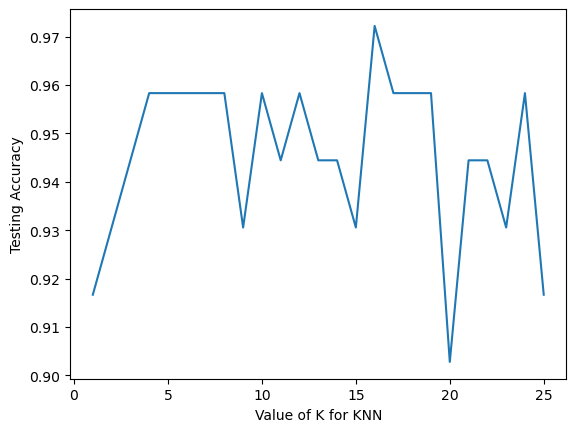

In [22]:
# Import k nearest neighbor model from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import metrics from sklearn to evaluate machine learning algorithms
from sklearn import metrics

# Running from k=1 through 25 and record testing accuracy for top 5 values from feature importance
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    	knn = KNeighborsClassifier(n_neighbors=k) # Create a KNeighborsClassifier model with n_neighbors set to k 
    	knn.fit(X_train2[sel_features],y_train2)  # Fit the model to the training data
    	y_pred = knn.predict(X_val[sel_features]) # Predict the labels of the validation data
    	scores[k] = metrics.accuracy_score(y_val,y_pred) # Store the accuracy of the model in the dictionary scores
    	scores_list.append(metrics.accuracy_score(y_val,y_pred)) # Append the accuracy of the model to the list scores_list

# Plot the testing accuracies as a function of the value of K
plt.plot(k_range,scores_list)

# Label both x and y axis
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Show the plot
plt.show()

The graph above displays values of K that can provide higher testing accuracy. After we run the program, we find out that the most suitable value of k is 17 since it has the highest testing accuracy.

The sudden drop in testing accuracy is likely due to the fact that KNN algorithm is too sensitive to noise when k is too small. To increase the accuracy, theoretically we should increase the value of k so that the algorithm is less likely to be influenced by outliers. But, the value of k should not so large that the algorithm becomes too slow.

In [23]:
# Create a KNeighborsClassifier model with n_neighbors set to 17
# Note: the value of k=17 was chosen based on graph above
knn = KNeighborsClassifier(n_neighbors=17)

# Fit the model to the training data
knn.fit(X_train2[sel_features],y_train2)

KNeighborsClassifier(n_neighbors=17)

In [24]:
# Use the KNN model to predict the labels for the X_val[sel_features] DataFrame
y_predict_knn = knn.predict(X_val[sel_features])

In [25]:
print('K-Nearest Neighbours\n')

# Print the accuracy of the model
print ('Accuracy:', accuracy_score(y_val, y_predict_knn))

# Print the recall of the model
print ('Recall:', recall_score(y_val, y_predict_knn, average="weighted"))

# Print the precision of the model
print ('Precision:', precision_score(y_val, y_predict_knn, average="weighted", zero_division=1))

# Print the F1 score of the model
print ('F1 Score:', f1_score(y_val, y_predict_knn, average="weighted"))

# Print the confusion matrix of the model
confusion = confusion_matrix(y_val, y_predict_knn)
print('Confusion Matrix:\n', confusion)

K-Nearest Neighbours

Accuracy: 0.9583333333333334
Recall: 0.9583333333333334
Precision: 0.9642255892255892
F1 Score: 0.9576719576719577
Confusion Matrix:
 [[22  0  0  0  0  0]
 [ 0 10  0  2  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  1  3]]


#### KNN
##### Hyperparameter tuning using GridSearch

In [26]:
# Hyperparameter tuning for knn
grid_params = { 'n_neighbors' : [5,7,13,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)

In [27]:
# Fit the model on our train set
g_res = gs.fit(X_train2[sel_features], y_train2)

# Find the best score
g_res.best_score_

# Fet the hyperparameters with the best score
g_res.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}

In [28]:
# Use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 18, weights = 'distance', algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train2[sel_features], y_train2)

KNeighborsClassifier(algorithm='brute', n_neighbors=18, weights='distance')

In [29]:
y_predict_knn2 = knn.predict(X_val[sel_features])

print('K-Nearest Neighbours (after hyperparameter tuning)\n')

# Print the accuracy of the model
print ('Accuracy:', accuracy_score(y_val, y_predict_knn2))

# Print the recall of the model
print ('Recall:', recall_score(y_val, y_predict_knn2, average="weighted"))

# Print the precision of the model
print ('Precision:', precision_score(y_val, y_predict_knn2, average="weighted", zero_division=1))

# Print the F1 score of the model
print ('F1 Score:', f1_score(y_val, y_predict_knn2, average="weighted"))

# Print the confusion matrix of the model
confusion = confusion_matrix(y_val, y_predict_knn2)
print('Confusion Matrix:\n', confusion)

K-Nearest Neighbours (after hyperparameter tuning)

Accuracy: 0.9444444444444444
Recall: 0.9444444444444444
Precision: 0.9478438228438227
F1 Score: 0.9440652557319223
Confusion Matrix:
 [[22  0  0  0  0  0]
 [ 0 11  0  0  0  1]
 [ 0  0 14  0  0  0]
 [ 0  2  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  1  3]]


Explanation:

In general, KNN with hyperparameter tuning using GridSearch should have better performance than KNN only. However, the result above shows the oppposite result. The performance dropped compared to normal KNN.

Based on our observation, we think that the sudden drop in performances is because we tuned the hyperparameter wrongly. We think that if we add more selection for value of k, the result might say otherwise. Hence, we will choose the result of KNN before hyperparamater tuning because it has higher accuracy and better result than the result before hyperparameter tuning.

#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description: After bulding the models using the right parameters and hyperparametes, comparison is done between both models using validation set. Once the result is calculated, the champion model is selected. The champion models are then used to do prediction using test set.

In [30]:
# Make predictions on the test set
y_predict_knn_test = knn.predict(X_test[sel_features])

print('K-Nearest Neighbours\nPrediction by using the test set:-\n')

# Print the accuracy of the model
print ('Accuracy:', accuracy_score(y_test, y_predict_knn_test))

# Print the recall of the model
print ('Recall:', recall_score(y_test, y_predict_knn_test, average="weighted"))

# Print the precision of the model
print ('Precision:', precision_score(y_test, y_predict_knn_test, average="weighted", zero_division=1))

# Print the F1 score of the model
print ('F1 Score:', f1_score(y_test, y_predict_knn_test, average="weighted"))

# Print the confusion matrix of the model
confusion = confusion_matrix(y_test, y_predict_knn_test)
print('Confusion Matrix:\n', confusion)

K-Nearest Neighbours
Prediction by using the test set:-

Accuracy: 0.9583333333333334
Recall: 0.9583333333333334
Precision: 0.9623015873015872
F1 Score: 0.9578584995251662
Confusion Matrix:
 [[22  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  1  0  8  0  1]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  3]]


<b>Conclusion:</b> KNN is the champion model because it has the highest values in performance metrics which are accuracy, precision, recall and F1 score. Hence, KNN algorithm will be used to predict the output in test set.

In [31]:
# Thank you and have a nice day

sambungan

In [32]:
np.random.seed(40)
tf.random.set_seed(40)
random.seed(40)

In [33]:
# This line selects all the rows of the dataset and all columns except the last column
X = dataset.iloc[:, :-1] #assigning features to a variable

# This line selects all the rows of the dataset and only the last column
y = dataset.iloc[:, -1]  ##assigning target to a variable

In [34]:
#X_train2 = X_train2[sel_features]
#X_val = X_val[sel_features]
#X_test = X_test[sel_features]

In [35]:
sel_features = ['clubbing of the rete ridges', 
               'fibrosis of the papillary dermis',
               'spongiosis', 'thinning of the suprapapillary epidermis',
               'elongation of the rete ridges',
               'exocytosis', 'vacuolisation and damage of basal layer',
               'koebner phenomenon', 'PNL infiltrate',
               'saw-tooth appearance of retes']

In [36]:
X_train2.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age
200,1,1,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,0,3
31,3,2,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
19,1,1,0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,3
41,1,1,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,1
150,1,2,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,0


In [37]:
#data preprocessing

#encode the label 
label_e = LabelEncoder()
label_e.fit(y)
y = label_e.transform(y)
y = to_categorical(y)
y

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [38]:
# Split the dataset 
# Note: Random state is used to split the same row constantly
# Note: Stratify argument is used to ensure that the proportions 
#       of the different classes in the training and test sets are the same
X_train, X_test, y_train, y_test = train_test_split(X[sel_features], y, test_size=0.2, random_state=5, stratify=y)

# Divide set for validation set
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5, stratify=y_train)

In [39]:
#convert numpy array to a  supported tensorflow datatype format
X_train2 = tf.convert_to_tensor(X_train2, dtype=tf.float32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [40]:
model = Sequential()
model.add(Dense(8, input_dim = len(X[sel_features].columns), activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(6, activation = 'softmax')) #softmax is used for multiclassification

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train2, y_train2, epochs = 15, batch_size = 5) 
scores = model.evaluate(X_val, y_val)

for i, m in enumerate(model.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

Epoch 1/15
43/43 [==============================] - 2s 3ms/step - loss: 1.7469 - accuracy: 0.3785
Epoch 2/15
43/43 [==============================] - 0s 3ms/step - loss: 1.6527 - accuracy: 0.5000
Epoch 3/15
43/43 [==============================] - 0s 3ms/step - loss: 1.4859 - accuracy: 0.5140
Epoch 4/15
43/43 [==============================] - 0s 4ms/step - loss: 1.3011 - accuracy: 0.5140
Epoch 5/15
43/43 [==============================] - 0s 4ms/step - loss: 1.1311 - accuracy: 0.5140
Epoch 6/15
43/43 [==============================] - 0s 4ms/step - loss: 1.0018 - accuracy: 0.5421
Epoch 7/15
43/43 [==============================] - 0s 4ms/step - loss: 0.9112 - accuracy: 0.6028
Epoch 8/15
43/43 [==============================] - 0s 3ms/step - loss: 0.8472 - accuracy: 0.6402
Epoch 9/15
43/43 [==============================] - 0s 3ms/step - loss: 0.7912 - accuracy: 0.6636
Epoch 10/15
43/43 [==============================] - 0s 4ms/step - loss: 0.7308 - accuracy: 0.7430
Epoch 11/15
43/43 [

In [42]:
#making predictions
y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

3/3 [==============================] - 0s 3ms/step


In [43]:
# Print the accuracy of the model
print ('Accuracy:', accuracy_score(y_test_class, y_pred))

# Print the recall of the model
print ('Recall:', recall_score(y_test_class, y_pred, average="weighted"))

# Print the precision of the model
print ('Precision:', precision_score(y_test_class, y_pred, average="weighted", zero_division=1))

# Print the F1 score of the model
print ('F1 Score:', f1_score(y_test_class, y_pred, average="weighted"))

# Print the confusion matrix of the model
confusion = confusion_matrix(y_test_class, y_pred)
print('Confusion Matrix:\n', confusion)

Accuracy: 0.9027777777777778
Recall: 0.9027777777777778
Precision: 0.9216686795491142
F1 Score: 0.8798029556650246
Confusion Matrix:
 [[22  0  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  1  1  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  4  0  0  0  0]]


Hyperparameter tuning

In [ ]:
#pip install keras-tuner --upgrade

In [44]:
import keras_tuner as kt

In [45]:
def make_model(optimizer):
    model = Sequential()
    
    optimizer_units = optimizer.Int('units', min_value=32, max_value=512, step=32)
    
    model.add(Dense( units=optimizer_units,  input_dim = len(X[sel_features].columns), activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(6, activation = 'softmax'))
    
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    optimizer_learning_rate = optimizer.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    
    model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=optimizer_learning_rate), metrics = ['accuracy'])
    return model

In [46]:
tuner = kt.Hyperband(make_model,
                    objective = 'val_accuracy',
                    max_epochs = 10,
                    factor =3,
                    directory = 'dir',
                    project_name = 'x')

INFO:tensorflow:Reloading Tuner from dir\x\tuner0.json


In [47]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [48]:
tuner.search(X_train2,y_train2,epochs=10,
             validation_split= 0.2 ,callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [49]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [50]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train2, y_train2, epochs = 15, callbacks=[stop_early]) 

Epoch 1/15
7/7 [==============================] - 1s 3ms/step - loss: 1.5342 - accuracy: 0.2897
Epoch 2/15
7/7 [==============================] - 0s 3ms/step - loss: 1.0154 - accuracy: 0.5654
Epoch 3/15
7/7 [==============================] - 0s 4ms/step - loss: 0.7308 - accuracy: 0.7430
Epoch 4/15
7/7 [==============================] - 0s 4ms/step - loss: 0.5923 - accuracy: 0.8037
Epoch 5/15
7/7 [==============================] - 0s 4ms/step - loss: 0.5041 - accuracy: 0.8505
Epoch 6/15
7/7 [==============================] - 0s 4ms/step - loss: 0.4057 - accuracy: 0.9112
Epoch 7/15
7/7 [==============================] - 0s 4ms/step - loss: 0.3408 - accuracy: 0.9019
Epoch 8/15
7/7 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.9112
Epoch 9/15
7/7 [==============================] - 0s 4ms/step - loss: 0.2898 - accuracy: 0.9112
Epoch 10/15
7/7 [==============================] - 0s 3ms/step - loss: 0.2712 - accuracy: 0.9112
Epoch 11/15
7/7 [======================

In [51]:
#making predictions
y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Print the accuracy of the model
print ('Accuracy:', accuracy_score(y_test_class, y_pred))

# Print the recall of the model
print ('Recall:', recall_score(y_test_class, y_pred, average="weighted"))

# Print the precision of the model
print ('Precision:', precision_score(y_test_class, y_pred, average="weighted", zero_division=1))

# Print the F1 score of the model
print ('F1 Score:', f1_score(y_test_class, y_pred, average="weighted"))

# Print the confusion matrix of the model
confusion = confusion_matrix(y_test_class, y_pred)
print('Confusion Matrix:\n', confusion)

3/3 [==============================] - 0s 4ms/step
Accuracy: 0.9166666666666666
Recall: 0.9166666666666666
Precision: 0.9328703703703702
F1 Score: 0.8919177977148992
Confusion Matrix:
 [[22  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  2  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 2  2  0  0  0  0]]


Hynrid Neural Network with Support Vector Machine (NN-SVM)

In [52]:
model2 = Sequential()
model2.add(Dense(8, input_dim = len(X[sel_features].columns), activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(6, kernel_regularizer= tf.keras.regularizers.L2(0.01), activation = 'softmax'))

model2.compile(loss = 'squared_hinge', optimizer = 'adam', metrics = ['accuracy'])
model2.fit(X_train2, y_train2, epochs = 15, batch_size = 5)
scores = model2.evaluate(X_val, y_val)

for i, m in enumerate(model2.metrics_names):
    print("\n%s: %.3f"% (m, scores[i]))

Epoch 1/15
43/43 [==============================] - 2s 3ms/step - loss: 1.3368 - accuracy: 0.2103
Epoch 2/15
43/43 [==============================] - 0s 3ms/step - loss: 1.3120 - accuracy: 0.4159
Epoch 3/15
43/43 [==============================] - 0s 3ms/step - loss: 1.2851 - accuracy: 0.5234
Epoch 4/15
43/43 [==============================] - 0s 3ms/step - loss: 1.2419 - accuracy: 0.5421
Epoch 5/15
43/43 [==============================] - 0s 3ms/step - loss: 1.1909 - accuracy: 0.6168
Epoch 6/15
43/43 [==============================] - 0s 3ms/step - loss: 1.1657 - accuracy: 0.6589
Epoch 7/15
43/43 [==============================] - 0s 3ms/step - loss: 1.1431 - accuracy: 0.6822
Epoch 8/15
43/43 [==============================] - 0s 3ms/step - loss: 1.0919 - accuracy: 0.6822
Epoch 9/15
43/43 [==============================] - 0s 3ms/step - loss: 1.0514 - accuracy: 0.6822
Epoch 10/15
43/43 [==============================] - 0s 3ms/step - loss: 1.0355 - accuracy: 0.6822
Epoch 11/15
43/43 [

In [53]:
#making predictions
y_pred = model2.predict(X_test)
y_pred2 = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

3/3 [==============================] - 0s 4ms/step


In [54]:
# Print the accuracy of the model
print ('Accuracy:', accuracy_score(y_test_class, y_pred2))

# Print the recall of the model
print ('Recall:', recall_score(y_test_class, y_pred2, average="weighted"))

# Print the precision of the model
print ('Precision:', precision_score(y_test_class, y_pred2, average="weighted", zero_division=1))

# Print the F1 score of the model
print ('F1 Score:', f1_score(y_test_class, y_pred2, average="weighted"))

# Print the confusion matrix of the model
confusion = confusion_matrix(y_test_class, y_pred2)
print('Confusion Matrix:\n', confusion)

Accuracy: 0.9027777777777778
Recall: 0.9027777777777778
Precision: 0.9095544820182503
F1 Score: 0.8758811140238847
Confusion Matrix:
 [[22  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  2  1  7  0  0]
 [ 0  0  0  0 10  0]
 [ 1  1  0  2  0  0]]


hyperparameter tuning

In [55]:
def make_model2(optimizer):
    model = Sequential()
    
    optimizer_units = optimizer.Int('units', min_value=32, max_value=512, step=32)
    
    model.add(Dense( units=optimizer_units,  input_dim = len(X[sel_features].columns), activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(6, kernel_regularizer= tf.keras.regularizers.L2(0.01), activation = 'softmax'))
    
    
    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    optimizer_learning_rate = optimizer.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    
    model.compile(loss = 'squared_hinge', optimizer = keras.optimizers.Adam(learning_rate=optimizer_learning_rate), metrics = ['accuracy'])
    return model

In [56]:
tuner = kt.Hyperband(make_model2,
                    objective = 'val_accuracy',
                    max_epochs = 5,
                    factor =3,
                    directory = 'dir',
                    project_name = 'x')

INFO:tensorflow:Reloading Tuner from dir\x\tuner0.json


In [57]:
tuner.search(X_train2,y_train2,epochs=10,
             validation_split= 0.2 ,callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [58]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [59]:
model2 = tuner.hypermodel.build(best_hps)
history = model2.fit(X_train2, y_train2, epochs = 15, callbacks=[stop_early])

Epoch 1/15
7/7 [==============================] - 1s 3ms/step - loss: 1.3046 - accuracy: 0.2336
Epoch 2/15
7/7 [==============================] - 0s 3ms/step - loss: 1.1621 - accuracy: 0.7944
Epoch 3/15
7/7 [==============================] - 0s 4ms/step - loss: 1.0601 - accuracy: 0.8551
Epoch 4/15
7/7 [==============================] - 0s 4ms/step - loss: 1.0246 - accuracy: 0.8879
Epoch 5/15
7/7 [==============================] - 0s 3ms/step - loss: 1.0136 - accuracy: 0.8879
Epoch 6/15
7/7 [==============================] - 0s 4ms/step - loss: 1.0008 - accuracy: 0.8972
Epoch 7/15
7/7 [==============================] - 0s 3ms/step - loss: 0.9878 - accuracy: 0.9019
Epoch 8/15
7/7 [==============================] - 0s 3ms/step - loss: 0.9679 - accuracy: 0.9159
Epoch 9/15
7/7 [==============================] - 0s 3ms/step - loss: 0.9477 - accuracy: 0.8925
Epoch 10/15
7/7 [==============================] - 0s 3ms/step - loss: 0.9226 - accuracy: 0.9065
Epoch 11/15
7/7 [======================

In [60]:
#making predictions
y_pred = model2.predict(X_test)
y_pred2 = np.argmax(y_pred, axis=1)
y_test_class2 = np.argmax(y_test, axis=1)

# Print the accuracy of the model
print ('Accuracy:', accuracy_score(y_test_class, y_pred2))

# Print the recall of the model
print ('Recall:', recall_score(y_test_class, y_pred2, average="weighted"))

# Print the precision of the model
print ('Precision:', precision_score(y_test_class, y_pred2, average="weighted", zero_division=1))

# Print the F1 score of the model
print ('F1 Score:', f1_score(y_test_class, y_pred2, average="weighted"))

# Print the confusion matrix of the model
confusion = confusion_matrix(y_test_class, y_pred2)
print('Confusion Matrix:\n', confusion)

3/3 [==============================] - 0s 4ms/step
Accuracy: 0.9305555555555556
Recall: 0.9305555555555556
Precision: 0.9412037037037037
F1 Score: 0.9053309602508688
Confusion Matrix:
 [[22  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 2  2  0  0  0  0]]
